In [12]:
%matplotlib inline

In [13]:
import torch
from torch import nn, optim
from torchsummary import summary
import torchvision
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt
import os

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))

Device: cuda:0


In [15]:
augs = torchvision.transforms.Compose([
    T.RandomRotation(degrees = 15),
    # T.Resize((40,40)),
    # T.RandomResizedCrop((32,32), scale = (0.8,1), ratio=(1,1)),
    T.ColorJitter(brightness = 0.2,contrast = 0.2, saturation = 0.2, hue = 0.2),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

test_transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

Load the Cifar10 dataset

In [16]:
batch_size_train = 128
batch_size_test = 128

train_data = torchvision.datasets.CIFAR10(root = './data',
                                          train = True,
                                          download=True,
                                          transform=augs)
test_data = torchvision.datasets.CIFAR10(root = './data',
                                          train = False,
                                          download=True,
                                          transform=test_transform)

train_loader = torch.utils.data.DataLoader(train_data,batch_size = batch_size_train, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size_test, shuffle = True)
print(train_loader)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

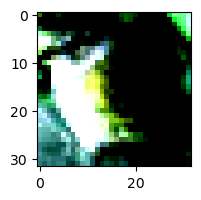

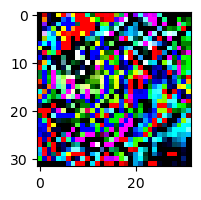

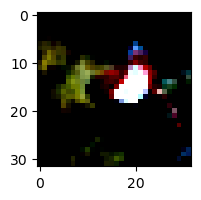

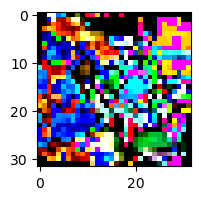

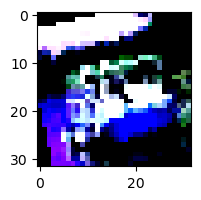

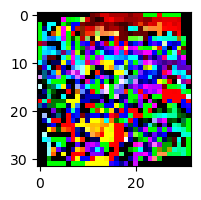

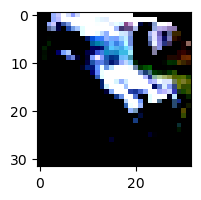

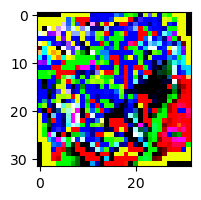

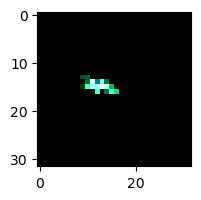

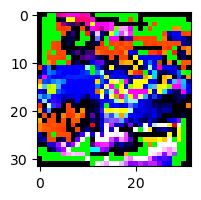

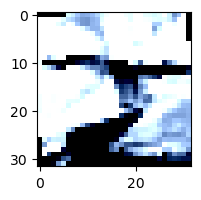

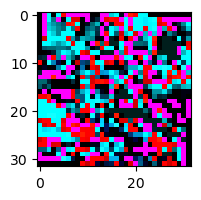

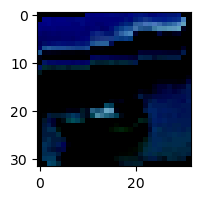

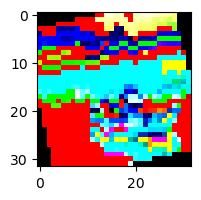

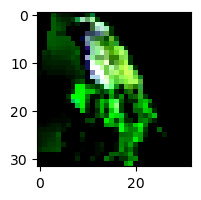

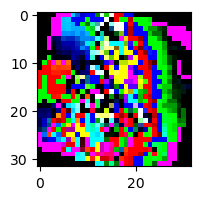

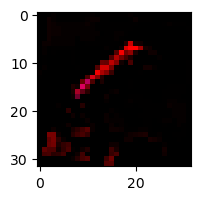

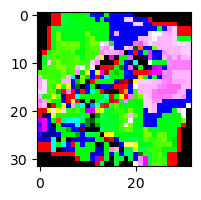

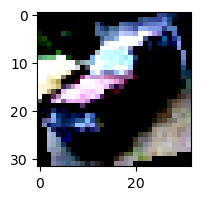

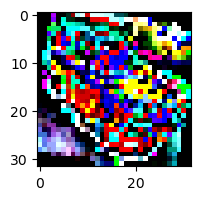

In [17]:
def imshow(img):
    plt.figure(figsize=(2,2))
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(train_loader)
images, labels = next(dataiter)

for i in range(10):
    imshow(torchvision.utils.make_grid(images[i]))
    temp = augs(T.functional.to_pil_image(images[i]))
    imshow(torchvision.utils.make_grid(temp))

Create the model

In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.aug = augs
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size=(3,3), padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size=(3,3), padding = 1)
        self.batchnorm1 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size=(3,3), padding = 1)
        self.conv4 = nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size=(3,3), padding = 1)
        self.batchnorm2 = nn.BatchNorm2d(128)

        self.conv5 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size=(3,3), padding = 1)
        self.conv6 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size=(3,3), padding = 1)
        self.conv7 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size=(3,3), padding = 1)
        self.batchnorm3 = nn.BatchNorm2d(256)

        self.conv8 = nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size=(3,3), padding = 1)
        self.conv9 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=(3,3), padding = 1)
        self.conv10 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = (3,3), padding = 1)
        self.batchnorm4 = nn.BatchNorm2d(512)

        self.conv11 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=(3,3), padding = 1)
        self.conv12 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=(3,3), padding = 1)
        self.conv13 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=(3,3), padding = 1)
        self.conv14 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size=(3,3), padding = 1)
        self.batchnorm5 = nn.BatchNorm2d(512)

        # FC layers
        self.linear1 = nn.Linear(512,4096, bias = True)
        self.dropout5 = nn.Dropout(p = 0.5)
        self.linear2 = nn.Linear(4096,4096, bias = True)
        self.linear3 = nn.Linear(4096,10)
        self.softmax = nn.Softmax(-1)

        # Intermediate layers
        self.dropout2 = nn.Dropout(p = 0.2)
        self.dropout4 = nn.Dropout(p = 0.4)
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2), stride=2)
        self.avgpool = nn.AvgPool2d(kernel_size=(2,2), stride=2)
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()

    def forward(self,x):
        x = self.relu(self.batchnorm1(self.conv1(x)))
        x = self.relu(self.batchnorm1(self.conv2(x)))
        x = self.maxpool(x)

        x = self.relu(self.batchnorm2(self.conv3(x)))
        x = self.relu(self.batchnorm2(self.conv4(x)))
        x = self.maxpool(x)

        x = self.relu(self.batchnorm3(self.conv5(x)))
        x = self.relu(self.batchnorm3(self.conv6(x)))
        x = self.relu(self.batchnorm3(self.conv7(x)))
        x = self.maxpool(x)

        x = self.relu(self.batchnorm4(self.conv8(x)))
        x = self.relu(self.batchnorm4(self.conv9(x)))
        x = self.relu(self.batchnorm4(self.conv10(x)))
        x = self.maxpool(x)

        x = self.relu(self.batchnorm5(self.conv11(x)))
        x = self.relu(self.batchnorm5(self.conv12(x)))
        x = self.relu(self.batchnorm5(self.conv13(x)))
        x = self.maxpool(x)
        # x = self.dropout5(x)

        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        # x = self.dropout5(x)
        x = self.linear3(x)

        return self.softmax(x)

model = CNN()
model.to(device)
summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
         MaxPool2d-7           [-1, 64, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]          73,856
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
        MaxPool2d-14            [-1, 12

Initialize hyperparamters

In [19]:
optimizer = optim.SGD(model.parameters(), momentum = 0.9, lr = 0.001, weight_decay=1e-5)
loss_func = nn.CrossEntropyLoss(reduction = 'mean')
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience = 5)
num_epochs = 200

Train the model

In [20]:
train_acc_list = []
val_acc_list = []

train_loss_list = []
val_loss_list = []

es_count = 0
curr_epoch = 0
curr_loss = 0

for epoch in range(num_epochs):

    if es_count == 20:
        print("Stop training")
        curr_epoch = epoch
        break
    model.train()
    train_loss = 0
    train_acc = 0

    for inputs, labels in train_loader:

        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        accuracy = (torch.max(outputs, dim=-1, keepdim=True)[1].flatten() == labels).sum() / len(labels)
        train_acc += accuracy.item()

    train_acc /= len(train_loader)
    train_loss /= len(train_loader)
    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)

    model.eval()
    test_acc = 0
    test_loss = 0

    with torch.no_grad():

        for inputs, labels in test_loader:

            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = loss_func(outputs, labels)
            test_loss += loss.item()
            accuracy = (torch.max(outputs, dim=-1, keepdim=True)[1].flatten() == labels).sum() / len(labels)
            test_acc += accuracy.item()

        test_acc /= len(test_loader)
        test_loss /= len(test_loader)
        val_acc_list.append(test_acc)
        val_loss_list.append(test_loss)

        scheduler.step(test_loss)

    if abs(test_loss - curr_loss) < 0.005 or test_loss > curr_loss:
        es_count += 1
        curr_loss = test_loss
    else:
        es_count = 0
        curr_loss = test_loss

    print(f"Epoch {epoch + 1}/{num_epochs} - Training Loss: {train_loss:.4f} - Validation Loss: {test_loss:.4f}")




Epoch 1/200 - Training Loss: 2.2792 - Validation Loss: 2.3349
Epoch 2/200 - Training Loss: 2.1736 - Validation Loss: 2.3310
Epoch 3/200 - Training Loss: 2.0467 - Validation Loss: 2.2873
Epoch 4/200 - Training Loss: 1.9676 - Validation Loss: 2.2477
Epoch 5/200 - Training Loss: 1.9174 - Validation Loss: 2.2797
Epoch 6/200 - Training Loss: 1.8821 - Validation Loss: 2.2520
Epoch 7/200 - Training Loss: 1.8550 - Validation Loss: 2.3023
Epoch 8/200 - Training Loss: 1.8351 - Validation Loss: 2.2400
Epoch 9/200 - Training Loss: 1.8166 - Validation Loss: 2.2491
Epoch 10/200 - Training Loss: 1.7891 - Validation Loss: 2.2411
Epoch 11/200 - Training Loss: 1.7631 - Validation Loss: 2.2703
Epoch 12/200 - Training Loss: 1.7472 - Validation Loss: 2.2602
Epoch 13/200 - Training Loss: 1.7324 - Validation Loss: 2.2344
Epoch 14/200 - Training Loss: 1.7237 - Validation Loss: 2.2397
Epoch 15/200 - Training Loss: 1.7158 - Validation Loss: 2.2502
Epoch 16/200 - Training Loss: 1.7051 - Validation Loss: 2.2430
E

KeyboardInterrupt: 

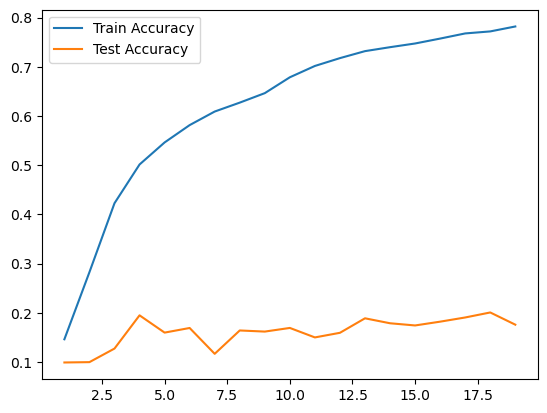

In [21]:
x = np.linspace(1,19,19)
plt.plot(x, train_acc_list, label = "Train Accuracy")
plt.plot(x, val_acc_list, label = "Test Accuracy")
plt.legend()


Evaluate test accuracy

In [ ]:
model.eval()
test_acc = 0
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    predictions = model(images)
    accuracy = (torch.max(predictions, dim=-1, keepdim=True)[1].flatten() == labels).sum() / len(labels)
    test_acc += accuracy.item()
test_acc /= len(test_loader)
print(f"Test accuracy: {test_acc:.3f}")